# ベクトル計算

## 四面体の体積
$t$ を実数とし，4点
$
A(t,0,0), B(0,t,0), C(0,0,t), D(t,t,t)
$
を頂点とする正四面体の体積 $V$ を計算しよう．

列ベクトルは成分をカンマ `,` で区切って記述する．

In [92]:
L = 1
@show a = [L, 0, 0]
@show b = [0, L, 0]
@show c = [0, 0, L]
@show d = [L, L, L]
;
# 以下のように書いても同じ
#[l
# 0
# 0]

a = [L, 0, 0] = [1, 0, 0]
b = [0, L, 0] = [0, 1, 0]
c = [0, 0, L] = [0, 0, 1]
d = [L, L, L] = [1, 1, 1]


スペースで区切ると行ベクトル（1×3行列) となってしまうので注意．

In [49]:
[l 0 0]

1×3 Matrix{Sym{PyCall.PyObject}}:
 l  0  0

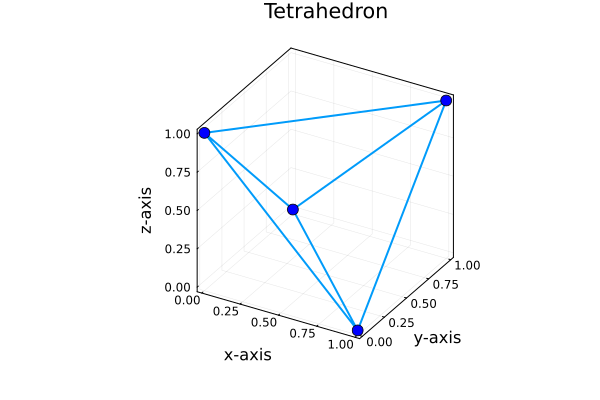

In [93]:
# 四面体の描画
using Plots
vertex = [a b c d]
edge = [a b c a d c b d]
plt = plot(edge[1, :], edge[2, :], edge[3, :], linewidth=2)

scatter!(plt,
    vertex[1, :], vertex[2, :], vertex[3, :],
    markersize=6, markercolor=:blue,
    xlabel="x-axis", ylabel="y-axis", zlabel="z-axis",
    title="Tetrahedron",
    framestyle=:box,
    legend=false
)

display(plt) # 表示

四面体の体積は，$|\vec{AD}\cdot (\vec{AB}\times \vec{AC})|/6$に等しい． 

In [94]:
using LinearAlgebra  # 外積計算のために必要
v = cross(b - a, c - a)  # 外積 AB x AC

3-element Vector{Int64}:
 1
 1
 1

In [95]:
V = abs(dot(d - a, v)) / 6

0.3333333333333333

正四面体の体積は一辺の長さを$L$としたとき， $\sqrt{2}L^3/12$である．  
$L = \sqrt{2} t$ より，$V = t^3/3$であるから，計算結果と確かに一致する．  

## SymPyを使った計算例
Symbolic Math ライブラリを使って，Dから三角形ABCへの垂線の足と高さを求める．  
Symbolic Math は，文字を変数（ラベル）としてではなく，未知変数として扱う計算方法のこと．    
SymPyパッケージが必要になるので，あらかじめJuliaを起動して `pkg> add SymPy` を実行しておく．


In [100]:
using SymPy
@syms s[1:3] t   # s₁, s₂, s₃, t を記号に設定
p = s[1] * a + s[2] * b + s[3] * c   # pを a,b,cの線形結合で表す
# p + t v = d, s₁ + s₂ + s₃ = 1 を連立させて解く．
sol = solve([p + t * v - d; sum(s) - 1], [s; t])
@show sol  # 解の表示
@show p.subs(sol)  # 解の代入

sol = Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}}(t => 2/3, s₃ => 1/3, s₂ => 1/3, s₁ => 1/3)
p.subs(sol) = Sym{PyCall.PyObject}[1/3; 1/3; 1/3;;]


3×1 Matrix{Sym{PyCall.PyObject}}:
 1/3
 1/3
 1/3

In [103]:
h = (t * v).subs(sol)
norm(h) # 四面体の高さ．symbolic mathでは根号もそのままの形で扱う．

    ___
2*\/ 3 
-------
   3   